In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import os
import numpy as np
from scipy.io import wavfile
from glob import glob
from sklearn.model_selection import train_test_split

In [2]:
# Directorio donde se encuentra el conjunto de datos speech_commands
data_dir = '/Users/andavaro/Desktop/Andrès/UBA/TrabajoDeGradoCEIA/VENV_Python/Tesis_IA/data/mini_speech_commands'

In [3]:
# Lista de palabras a clasificar (ajusta esta lista según las palabras que quieras incluir)
labels = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']

In [21]:
# Función para cargar los archivos de audio y convertirlos en características utilizables
def load_audio(file_path):
    _, audio = wavfile.read(file_path)
    #print('audio_0: ',len(audio))
    return audio.astype(np.float32)

def preprocess_data(data_dir, labels):
    X, y = [], []
    cont=0
    for label_index, label in enumerate(labels):
        # Buscar todos los archivos de audio para la etiqueta específica
        file_paths = glob(os.path.join(data_dir, label, '*.wav'))
        
        # Cargar y preprocesar cada archivo de audio
        for file_path in file_paths:
            audio = load_audio(file_path)
            #print('audio32: ',len(audio))
            if len(audio)== 16000:
                cont=cont+1

                X.append(audio)            
                y.append(label_index)
    #print('X; ',X)
    #print('y: ',y)
    #print('Diferentes: ',cont)
    
    return np.array(X), np.array(y)

In [22]:
# Cargar y preprocesar los datos
X, y = preprocess_data(data_dir, labels)

Diferentes:  7178


In [37]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Convertir las etiquetas en codificación one-hot
y_train = to_categorical(y_train, len(labels))
y_test = to_categorical(y_test, len(labels))

In [25]:
# Normalizar los datos (opcional pero recomendado)
X_train /= 255.0
X_test /= 255.0

In [27]:
# Crear el modelo CNN
model = models.Sequential([
    layers.Conv1D(32, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(labels), activation='softmax')
])

In [28]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
# Entrenar el modelo
history = model.fit(X_train[:, :, np.newaxis], y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
144/144 [==============================] - 26s 179ms/step - loss: 13407.0996 - accuracy: 0.4041 - val_loss: 21678.8965 - val_accuracy: 0.3090
Epoch 2/10
144/144 [==============================] - 26s 178ms/step - loss: 22418.0703 - accuracy: 0.3943 - val_loss: 28577.8008 - val_accuracy: 0.3055
Epoch 3/10
144/144 [==============================] - 25s 177ms/step - loss: 24499.7168 - accuracy: 0.4209 - val_loss: 39523.8047 - val_accuracy: 0.2994
Epoch 4/10
144/144 [==============================] - 26s 178ms/step - loss: 32712.5742 - accuracy: 0.4350 - val_loss: 52900.6602 - val_accuracy: 0.3046
Epoch 5/10
144/144 [==============================] - 26s 178ms/step - loss: 43577.5469 - accuracy: 0.4204 - val_loss: 76208.1094 - val_accuracy: 0.3124
Epoch 6/10
144/144 [==============================] - 26s 178ms/step - loss: 55590.8203 - accuracy: 0.4291 - val_loss: 126885.0625 - val_accuracy: 0.3029
Epoch 7/10
144/144 [==============================] - 26s 178ms/step - loss: 7083

In [32]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test[:, :, np.newaxis], y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

45/45 [==============================] - 4s 91ms/step - loss: 220455.7500 - accuracy: 0.2953
Loss: 220455.75, Accuracy: 0.2952646315097809


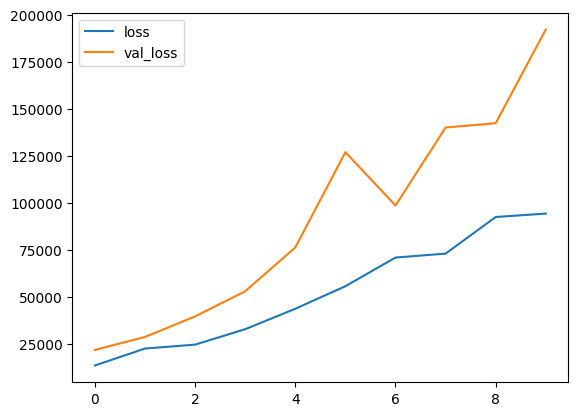

In [33]:
import matplotlib.pyplot as plt

metrics2 = history.history
plt.plot(history.epoch, metrics2['loss'], metrics2['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [40]:
y_pred = np.argmax(model.predict(X_test), axis=1)

test_acc = sum(y_pred == y_true) / len(y_true)
print(f'Test set accuracy: {test_acc:.0%}')

45/45 [==============================] - 4s 96ms/step
Test set accuracy: 30%


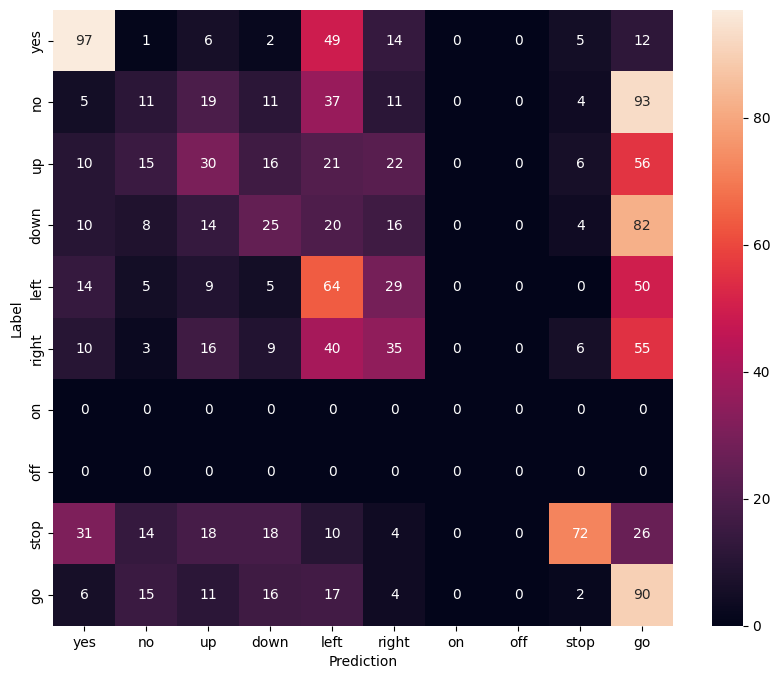

In [41]:
import seaborn as sns

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=labels,
            yticklabels=labels,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()